# Explore here

Airbnb en Nueva York
Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.

Paso 1: Carga del conjunto de datos
Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv. Almacena los datos en crudo en la carpeta ./data/raw.

Paso 2: Realiza un EDA completo
Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

Paso 3: Guarda el conjunto de datos procesado
Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben subir a git.

## Paso 1: Cargar el conjunto de datos.

In [2]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Paso 2: EDA.

In [3]:
total_data.shape

(48895, 16)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Se pueden observar varios puntos a tener en cuenta:

- Existen un total de 48895 filas ( en este caso son viviendas localizadas en Nueva York) y 16 columnas, de las cuales podemos descartar algunas a la hora de realizar el EDA.
- La mitad de las columnas (8) se componen de caracteristicas numéricas y la otra mitad (8) se componen de caracteristicas categóricas.
- Las variables *last_review* y *reviews_per_month* cuentan con una gran cantidad de valores nulos, las variables *name* y *host_name* con una pequeña cantidad de nulos, y el resto de variables cuentan siempre con valor.

## Eliminación de duplicados.

In [26]:
print(f"El numero de duplicados de la columna name es de: {total_data['name'].duplicated().sum()}")
print(f"El numero de duplicados de la columna host_id es de: {total_data['host_id'].duplicated().sum()}")
print(f"El numero de duplicados de la columna id es de: {total_data['id'].duplicated().sum()}")

El numero de duplicados de la columna name es de: 989
El numero de duplicados de la columna host_id es de: 11438
El numero de duplicados de la columna id es de: 0


## Eliminar columnas irrelevantes

In [ ]:
total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## Análisis de variables categóricas

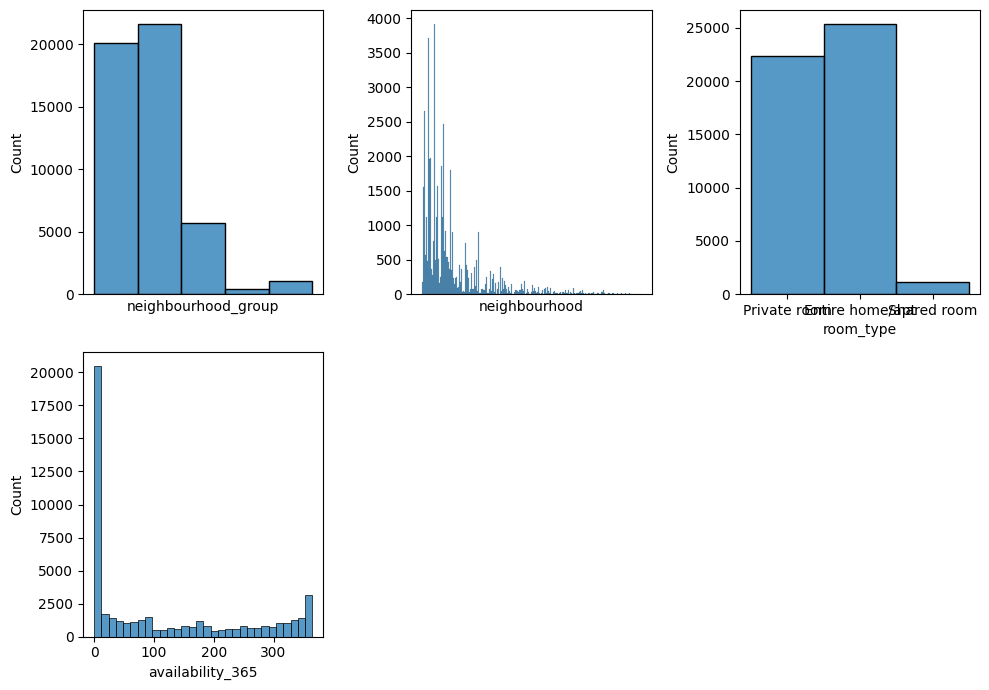

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,0], data = total_data, x = "availability_365")
fig.delaxes(axis[1,1])
fig.delaxes(axis[1,2])

plt.tight_layout()

plt.show()

En este histograma se pueden observar los siguientes puntos:
- **Neighbourhood_group**: Se analizan los 5 distritos de Nueva York.
- **Neighbourhood**: Hay una gran diferencia de ofertas de alojamiento entre los distintos barrios.
- **Apartamentos**: Hay más ofertas de apartamentos enteros que de habitaciones privadas, y muchas más que de habitaciones compartidas.
- **Avaiability**: La mayoria de los apartamentos estan disponibles los 365 días del año, pero se puede observar que hay una gran cantidad de apartamentos que no tienen disponibilidad, lo que no tiene mucho sentido.

## Análisis de variables numéricas

IndexError: index 2 is out of bounds for axis 0 with size 2

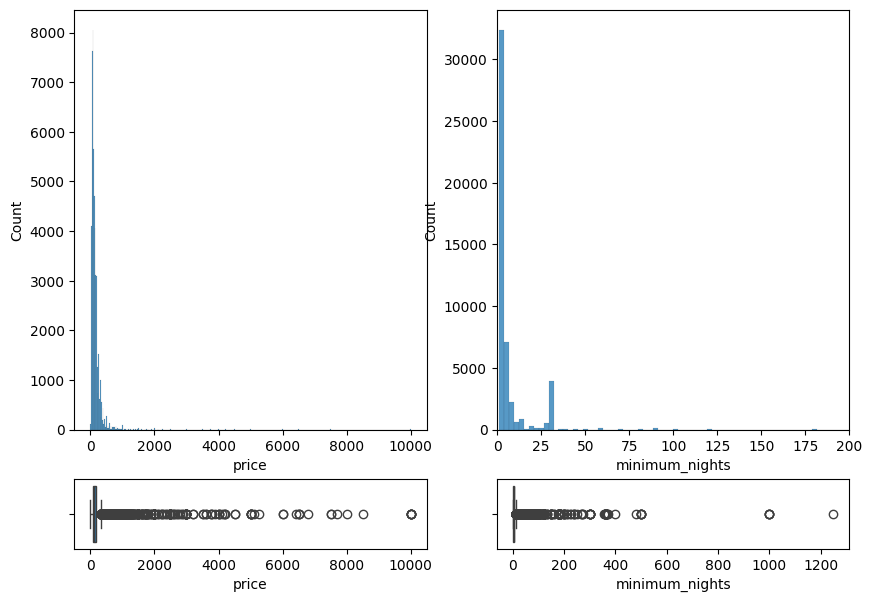

In [41]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3,1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()

# Mostrar el plot
plt.show()